
# Introduction aux méthodes numériques
## METHODE DES DIFFERENCES FINIES
## Résolution d'un problème électrosatique 1D

On désire calculer la distribution du champ électrostatique dans un condensateur plan
d'épaisseur L (fig.1).

<img src = "condensateur1D.png" title = "Condensateur Plan" alt = "condo">

Les deux plans parallèles sont supposés infinis et on envisage une approche
monodimensionnelle : Le potentiel électrostatique ne dépend que de "x". Ce problème
nécessite la résolution de l’équation de Laplace en 1D. Elle est obtenue en utilisant les
équations de Maxwell. En l’absence de charge électrique le champ électrique E est à flux
conservatif div(E)=0. Ce champ dérive d’un potentiel E=-grad(V).

$\frac{\delta^2 V}{\delta x^2} = 0, \ 0<x<L \\  $ <br />
$V(0)=1 ; V(L)=0 $

+ V est le potentiel électrostatique
+ L la longueur entre les deux plaques




### Etude théorique préliminaire

1. Déterminer l'expression analytique du potentiel.
2. En écrivant les développements limités (de Taylor) de f(x + h) et f(x-h) à l'ordre 3, montrer que :

$ f''(x)=\frac{f(x+h)+f(x-h)-2f(x)}{h^2}+ O(h^2)\\  $ <br />

3. On envisage une méthode de **différences finies** pour la résolution numérique du problème.
On réalise pour cela une discrétisation spatiale de l'intervalle [0,L] en (N+1) segments
de longueur h. Les potentiels aux "N" points d'abscisses $x_i$ ($x_i = ih$) sont notées $V_i$ $V (x_i) $ pour i=1, ...
N. Déduire de 2°) que l'on peut remplacer en $x_i$, en négligeant le terme en O ( h ) ,
l'équation aux dérivées partielles (1) par l'équation :

$ \frac{1}{h^2}[V_{i+1}-2V_i+V_{i-1}]=0 $ <br />

4. Montrer que l'écriture en tout point xi de l'équation (2) conduit à la résolution d'un système
matriciel différentiel d'ordre N du type :

$[A][V]=[F]$


où le vecteur V a pour composantes les valeurs Vi.
Préciser la matrice A et le vecteur F. Compléter le programme Python ci dessous et résoudre ce système. Comparer la solution numérique avec la solution analytique.




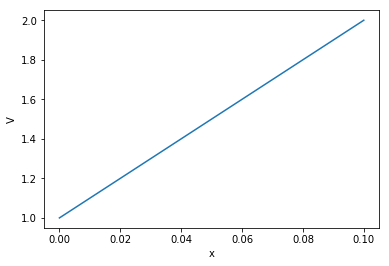

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

#=====================================================#
# ESME 2019 : exemple differences finies en 1 DIMENSION #
#						      #
# Resolution du probleme electrostatique :       #
#                                                     #
#     d2V(x)/dx2 = 0     sur   0 < x < L      #
#=====================================================#


# Definition des constantes physiques et geometriques

L = 0.1      #  Largeur de la cloison

# Conditions aux limites
V1 = 1     #  Potentiel en x =0
V2 = 2    #  Potentiel en x = L  

# Parametres numeriques du calcul
Nx = 20     #  Nombre de points internes de discretisation
h  = L/(Nx+1) #  Pas de discretisation spaciale


# Construction de A (matrice de raideur) et de F (terme source)
ksch2 = 1./(C*h**2)           #  inverse d'une Cte de temps

A = # ---- a completer #  diagonale principale de A
F=np.zeros((Nx,1))
for i in range(Nx-1) :  # deux autres diagonales 
    A[i,i+1]=   # ---- a completer
    A[i+1,i]=  # ---- a completer

    F[0,0] = # ---- a completer   #  seul le dernier terme de F est non nul
    F[Nx-1,0] = # ---- a completer   #  seul le dernier terme de F est non nul
    
V = np.linalg.solve(A, F) # inversion du systeme matriciel

#  Reconstruction de la solution 

x_visu=np.linspace(0.,L,Nx+2)
V_visu=np.insert(V,[0,Nx],[V1,V2])


plt.plot(x_visu,V_visu)
plt.ylabel('V')
plt.xlabel('x')
plt.show()
        

5. Quelles seraient les modifications à apporter au programme si l’intérieur du condensateur était composé de plusieurs matériaux.

# Discrétisation temporelle

Dans cet exercice, on se propose d’étudier un problème dépendant du temps. Sa résolution en
plus d’une discrétisation spatiale va nécessiter une discrétisation temporelle.

## RESOLUTION DE L’EQUATION DE LA CHALEUR 1D PAR DIFFERENCES FINIES

On retrouve la même forme d’équation pour la résolution d’un problème thermique en
statique. Le second membre (terme source thermique) peut provenir de conditions aux limites
(température imposée sur les parois) mais aussi d’une source de chaleur (radiateur par exemple). Le problème peut également intégrer une évolution en temps de la température. On
résout alors l’équation de la chaleur en régime temporel.
On désire calculer la distribution de température en régime transitoire dans une cloison d'épaisseur L composée d'un matériau homogène et isotrope (fig.1).
<img src = "condensateur1D.png" title = "Condensateur Plan" alt = "condo">


On assimile les deux parois à deux plans infinis parallèles et on envisage une approche
monodimensionnelle  la température entre les deux parois ne dépend que de "x" :
$T =T(x,t) \ 0<x<L$ .
A l'instant initial la température est nulle dans tout le domaine T(x,0)=0.°C
On applique à la paroi n°2 (intérieure) un échelon temporel de température :
$T(L,t)=T_{int}=20°C$
Tandis que l'on maintient la paroi n°1 (extérrieure) à une température nulle :
T(0,t )=Text=0°C

On se propose de calculer l'évolution, au cours du temps, de la température interne.
On cherche alors T(x,t) solution du problème différentiel suivant :

$\frac{\delta T}{\delta t}  -k \frac{\delta^2 T}{\delta x^2} = 0, \ 0<x<L $ <br />
$T(0,t)=Text ; T(L,t)=Tint (t>0) $ <br />
$T(x,0)=0 ; 0<x<L $ <br />

+ T est la température
+ C(J/m3/°C) est la capacité calorifique
+ k (W/m/°C) est la conductivité thermique




1. Calculer $[T^\infty]$, le vecteur des valeurs $T^\infty_i $ du régime permanent. Comparer avec la solution exacte.
2. Pour l'étude du régime transitoire on considère l’équation sous forme matricielle suivante:<br />
$\frac{d}{dt}[T(t)]+[A][T(t)]=[F]$

On désire discrétiser en temps le système (4) avec un pas de temps constant $\Delta t$.
En utilisant un développement limité au premier ordre, proposer une approximation de la
dérivée première en temps en fonction d’un pas en temps $\Delta t$.

+ Méthode Euler explicite : en considérant que l’on connait la solution T(t) à l’instant t, proposer une méthode numérique permettant de connaitre $T(t+\Delta t)$.
+ Méthode Euler implicite : on remplace le terme $ [A][T(t)] $ par $[A][T(t+ \Delta t)] $(c'est-à-dire que le terme de discrétisation en espace n’est pas connu), proposer une méthode numérique
permettant de calculer $ T(t+ \Delta t)$.
3. Résoudre le système différentiel ( $ \Delta t = 5 s$ ou $\Delta t = 10 s$) par les méthodes suivantes :
+ Euler explicite
+ Euler implicite <br />
On tracera l'évolution temporelle de la température en un point de discrétisation. Qu’observe-
t’on pour la méthode explicite ? Quelle conclusion peut-on en tirer ?
4. Représenter la distribution spatiale de température dans le domaine au bout de 250 s (par
exemple !).



In [1]:
# -*- coding: utf-8 -*-
"""
Éditeur de Spyder

Ceci est un script temporaire.
"""

# -*- coding: utf-8 -*-
"""
Created on Wed Feb 13 21:29:43 2019

@author: laurent
"""
#=====================================================#
# ESME 2019 : exemple differences finies en 1 DIMENSION #
#						      #
# Resolution du probleme thermique en temporel:                            #
#                                                     #
#    C.dT/dt - k.d2T/dx2 = 0     sur   0 < x < L      #
#=====================================================#


import math
import numpy as np
import matplotlib.pyplot as plt

# Definition des constantes physiques
C = 1.e+6;   		#  Capacite calorifique
k = 1.0;		#  Conductivite thermique
L = 0.1;		#  Largeur de la cloison

# Conditions initiales
T0 = 0;		#  Temperature initiale

# Conditions aux limites
Text = T0;		#  Temperature exterieure
Tint = 20.0;		#  Temperature interieure pour t>0  

# Parametres numeriques du calcul
Nx = 20		#  Nombre de points internes de discretisation
h  = L/(Nx+1);	#  Pas de discretisation spatiale
Ndt= 30		#  Nombre de pas de temps
dt = 20.0		#  Pas de temps


# Construction de A (matrice de raideur) et de F (terme source)
ksch2 = 1./(C*h**2)           #  inverse d'une Cte de temps

A = # ---- a completer#  diagonale principale de A
F=np.zeros((Nx,1))

for i in range(Nx-1) :  # deux autres diagonales 
    A[i,i+1]=# ---- a completer
    A[i+1,i]=# ---- a completer

    F[0,0] = # ---- a completer   #  seul le dernier terme de F est non nul
    F[Nx-1,0] = # ---- a completer   #  seul le dernier terme de F est non nul
    
T= np.linalg.solve(A, F) # inversion du systeme matriciel

#  Reconstruction de la solution 

x_visu=np.linspace(0.,L,Nx+2)
T_visu=np.insert(T,[0,Nx],[Text,Tint])


plt.plot(x_visu,T_visu)
plt.ylabel('T')
plt.xlabel('x')
plt.show()

Ttran_ini=np.zeros((Nx,Ndt))
# Solution exacte en R.P.
Tinf=np.zeros((Nx,1))
for i in range(Nx) :
    Tinf[i] = Text + (Tint-Text)*i/(Nx+1)
    Ttran_ini[i,0] = T0 -Tinf[i]


#++++++++++++++++++++++++++++
# Etude du regime transitoire
#++++++++++++++++++++++++++++
Teuex=np.zeros((Nx,Ndt))
Teuim=np.zeros((Nx,Ndt))

# Valeur du Vecteur Initial Ttran
#Ttran_ini[:,0] = T0*np.ones((Nx,1))   - Tinf[:,0]

# Calcul des valeurs propres de A
#Valp = eig(A);

# Calcul du pas de temps max. pour Euler Explicite

#dtmax=2/max(Valp);
#disp(dtmax);
#print('Valeur max. du pas de temps : ',dtmax)
# Resolution pas a pas dans le temps avec Euler Explicite
dteuex=dt;
Teuex[:,0] = Ttran_ini[:,0];
for k in range(Ndt-1):
   Teuex[:,k+1] = # ---- a completer


# Resolution pas a pas dans le temps avec Euler Implicite
dteuim=dt
Teuim [:,0]= Ttran_ini[:,0]
for k in range(Ndt-1):
   Teuim[:,k+1] = # ---- a completer


# Ajout de la valeur en R.P.
for k  in range(Ndt):
    for i in range(Nx) :
        Teuex[i,k] +=  Tinf[i]  
        Teuim[i,k] +=  Tinf[i]   
   
t=range(Ndt)
i=Nx-1
plt.plot(t,Teuex[i,:],'--',t,Teuim[i,:],'-+' )
plt.ylabel('V')
plt.xlabel('x')
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-b463527934fa>, line 49)